# Dataset link :
https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset

# The imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import pickle

# Reading and consultation

In [2]:
df = pd.read_csv('DepressionStudentDataset.csv')

In [3]:
df.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [5]:
df.head(3)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes


# Encoding labels

In [ ]:
# Identify categorical columns
X = df.drop(columns=['Depression'])
y = df['Depression']

categorical_cols = X.select_dtypes(include=['object']).columns

# Create a dictionary to store the encoders
encoders = {}

# Iterate through categorical columns and apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Save the encoders using pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# Trying models

In [ ]:
def evaluate_classifiers(X, y):
    """Trains and evaluates multiple classifiers on the given data."""
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify for imbalanced data

    # Scale numerical features (important for some classifiers like SVM, KNN) - Adjust if needed based on your data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Support Vector Machine": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
    }
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)  # Includes precision, recall, F1-score
        results[name] = {"accuracy": accuracy, "classification_report": report}
    return results



results = evaluate_classifiers(X, y)

for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}\n")

Classifier: Logistic Regression
Accuracy: 0.9802
Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.98      0.98        50
         Yes       0.98      0.98      0.98        51

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Classifier: Support Vector Machine
Accuracy: 0.9307
Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.86      0.92        50
         Yes       0.88      1.00      0.94        51

    accuracy                           0.93       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.93      0.93       101


Classifier: Decision Tree
Accuracy: 0.8614
Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.86      0.86        50
         Yes       0.8

# Plot and saving best model

     Gender  Age  Academic Pressure  Study Satisfaction  Sleep Duration  \
171       1   33                2.0                 4.0               2   
236       0   18                1.0                 5.0               2   
36        0   22                1.0                 1.0               2   
430       1   28                3.0                 2.0               3   
146       1   29                5.0                 3.0               0   
..      ...  ...                ...                 ...             ...   
112       0   21                1.0                 4.0               1   
466       0   20                3.0                 4.0               3   
301       0   32                4.0                 3.0               2   
428       0   27                3.0                 4.0               0   
443       0   25                3.0                 1.0               1   

     Dietary Habits  Have you ever had suicidal thoughts ?  Study Hours  \
171               2     

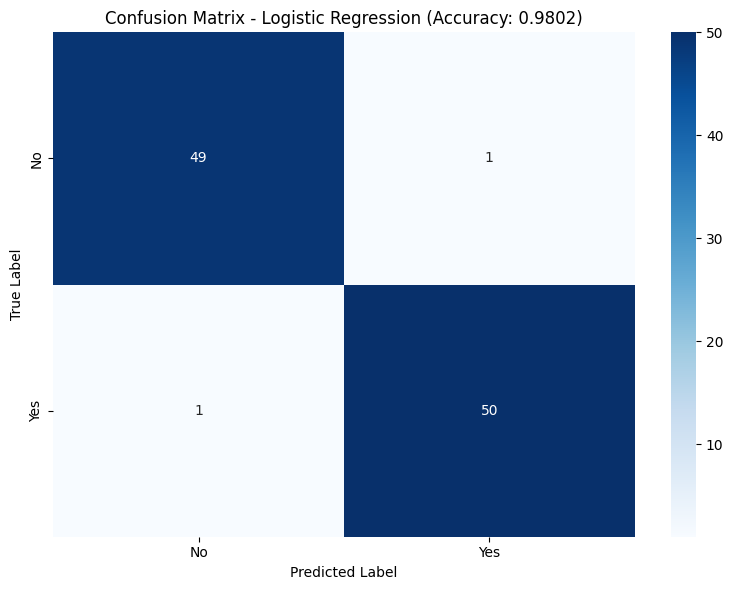

Best Classifier: Logistic Regression


In [ ]:
def evaluate_and_plot_best(X, y, save_path='best_classifier'):
    """
    Evaluates classifiers, finds the best, plots its confusion matrix, 
    and saves the best classifier.
    
    Parameters:
    -----------
    X : pandas DataFrame or numpy array
        Features dataset
    y : pandas Series or numpy array
        Target variable
    save_path : str, optional (default='best_classifier')
        Base path for saving classifier, confusion matrix, and results
    
    Returns:
    --------
    tuple: (best_classifier_name, all_results)
    """
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    print(X_train)
    
    
    # Define classifiers
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Support Vector Machine": SVC(probability=True),  # Enable probability estimates
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
    }
    
    # Evaluate classifiers
    results = {}
    best_classifier = None
    best_accuracy = 0

    for name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        # Store results
        results[name] = {"accuracy": accuracy, "classification_report": report}
        
        # Track best classifier
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_classifier = (name, clf, y_pred, scaler)
    
    # Unpack best classifier information
    best_name, best_clf, y_pred_best = best_classifier
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
    plt.title(f"Confusion Matrix - {best_name} (Accuracy: {best_accuracy:.4f})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    plt.close()  # Close the plot to free up memory
    
    
    
    # Save best classifier and scaler
    joblib.dump(best_clf, f"{save_path}_model.joblib")

    
    
    return best_name, results

# Example usage
def load_best_classifier(save_path='best_classifier'):
    """
    Load the saved best classifier and scaler.
    
    Parameters:
    -----------
    save_path : str, optional (default='best_classifier')
        Base path where classifier was saved
    
    Returns:
    --------
    tuple: (loaded_classifier, loaded_scaler)
    """
    loaded_clf = joblib.load(f"{save_path}_model.joblib")
    loaded_scaler = joblib.load(f"{save_path}_scaler.joblib")
    return loaded_clf, loaded_scaler


best_name, all_results = evaluate_and_plot_best(X, y)
print(f"Best Classifier: {best_name}")